# Animation of 3D models generated by spateo

In [1]:
import io, warnings
import base64
from IPython.display import HTML

import spateo as st
warnings.filterwarnings('ignore')

2023-07-26 18:08:19.246980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load the data

In [3]:
cpo = [(553, 1098, 277), (1.967, -6.90, -2.21), (0, 0, 1)]

# embryo mesh，see also ``3D Rconstruction.ipynb``
embryo_mesh = st.tdr.read_model(f"E7-9h_embryo_mesh_model.vtk")
st.tdr.scale_model(model=embryo_mesh, scale_factor=1.05, inplace=True)

# tissue mesh，see also ``3D Rconstruction.ipynb``
tissues_name = ["amnioserosa", "CNS", "midgut", "salivary gland", "muscle", "epidermis"]
tissues_mesh = [st.tdr.read_model(f"E7-9h_mesh_model_{tissue_name}.vtk") for tissue_name in tissues_name]

## Visualize the 3D models of each tissue individually

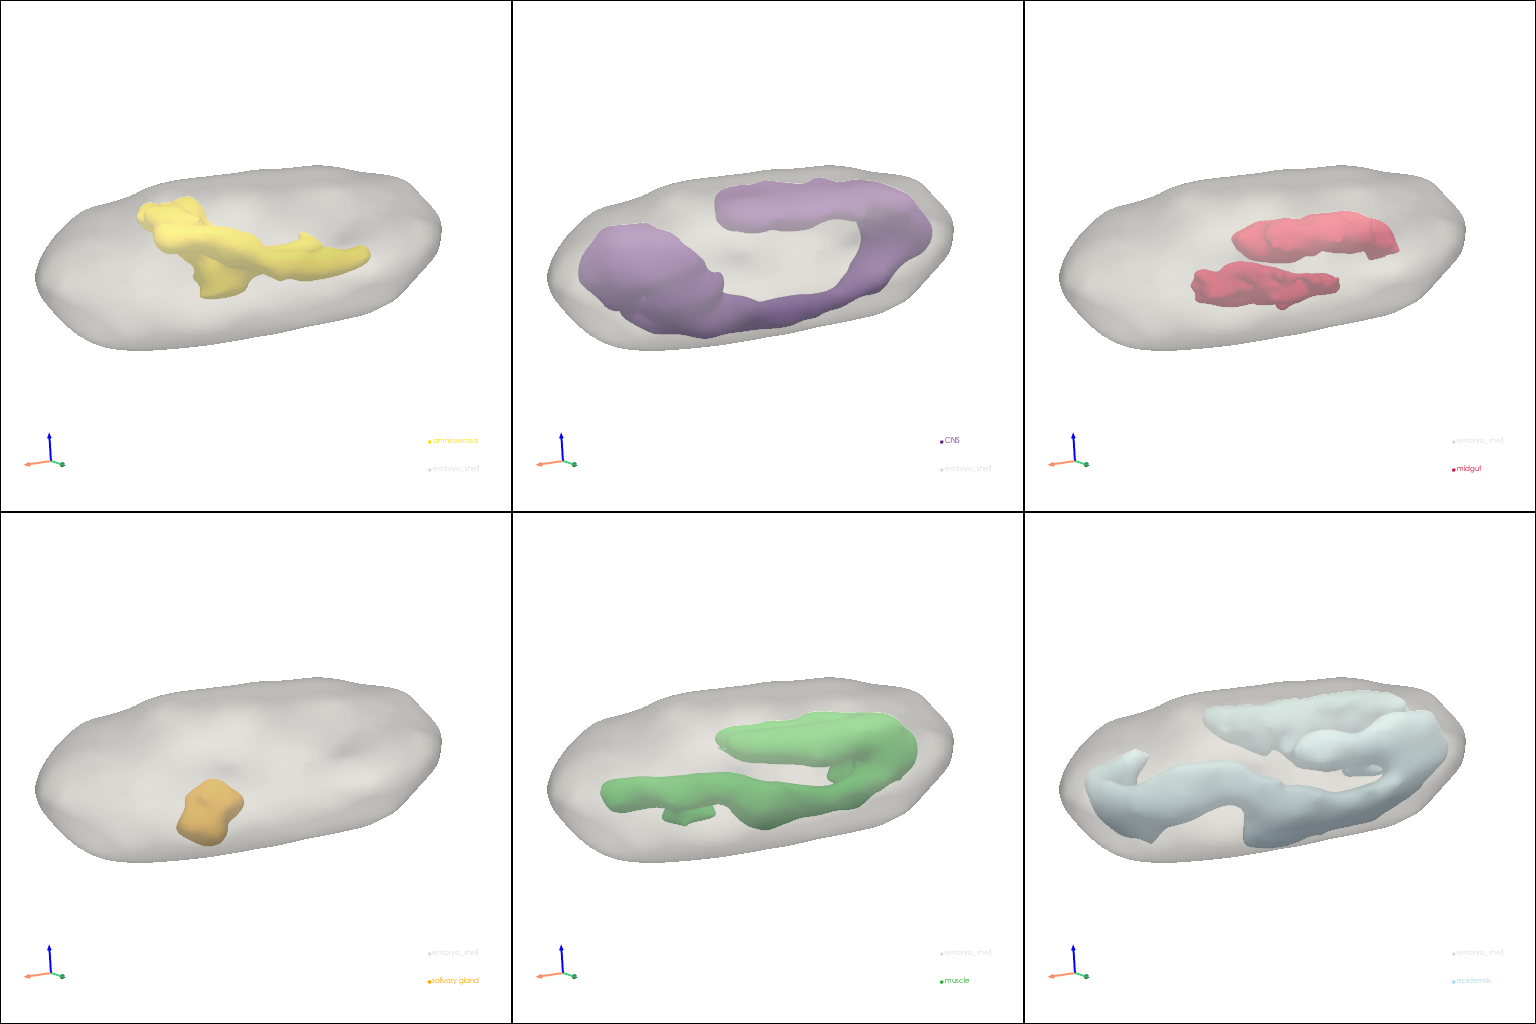

In [5]:
st.pl.three_d_multi_plot(
    model=st.tdr.collect_models([st.tdr.collect_models([embryo_mesh, tm]) for tm in tissues_mesh]),
    key="tissue", model_style="surface", cpo=[cpo], shape=(2, 3), jupyter="static",
)

## Integrate 3D models of all tissues

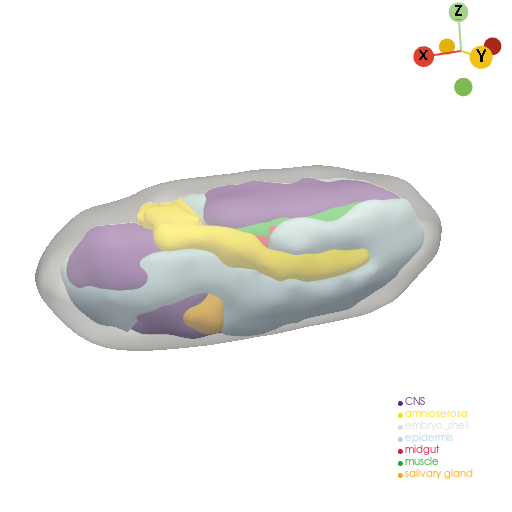

In [6]:
integrated_meshes = tissues_mesh.copy()
integrated_meshes.append(embryo_mesh)
st.pl.three_d_plot(model=st.tdr.collect_models(integrated_meshes), key="tissue", model_style="surface", cpo=cpo, jupyter="static",)

## Animate 3D models

In [7]:
st.pl.three_d_plot(
    model=st.tdr.collect_models(integrated_meshes),
    key="tissue",
    filename=f"E7-9h_completed_model_animation1.mp4",
    model_style="surface",
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(1024, 1024),
    cpo=cpo,
    text=f"\nAxis of rotation: D-V",
    view_up=(0, 0, 1),
    framerate=6)

st.pl.three_d_plot(
    model=st.tdr.collect_models(integrated_meshes),
    key="tissue",
    filename=f"E7-9h_completed_model_animation2.mp4",
    model_style="surface",
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(1024, 1024),
    cpo=cpo,
    text=f"\nAxis of rotation: A-P",
    view_up=(1, 0, 0),
    framerate=6)

st.pl.merge_animations(
    mp4_files=[
        f"E7-9h_completed_model_animation1.mp4",
        f"E7-9h_completed_model_animation2.mp4"
    ],
    filename=f"E7-9h_merged_completed_model_animation.mp4"
)

Moviepy - Building video visualize_sample/E7-9h_merged_completed_model_animation.mp4.
Moviepy - Writing video visualize_sample/E7-9h_merged_completed_model_animation.mp4



Moviepy - Done !
Moviepy - video ready visualize_sample/E7-9h_merged_completed_model_animation.mp4


In [6]:
vedio_path = "./video/E7-9h_merged_completed_model_animation.mp4"
video = io.open(vedio_path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(
    data=
    '''
    <video width="500" height="500"  controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
    '''.format(encoded.decode('ascii'))
)